In [1]:
#Load the experiment data.
import requests
r = requests.get('''https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/housing_scale''')

In [2]:
from sklearn.datasets import load_svmlight_file
from io import BytesIO
def get_data():
    data = load_svmlight_file(f=BytesIO(r.content),n_features=13)
    return data[0].todense(), data[1]
X,y=get_data()

In [3]:
#preprocess
import numpy as np
samp_num,feat_num=X.shape
#reshape使用：（-1，1）代表0列数固定 行数需要计算
X = np.column_stack((X, np.ones((samp_num, 1))))
y = y.reshape((-1, 1))

In [4]:
#division of training set and validation set
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

In [5]:
#Get the value of parameter  by the closed-form solution
W=np.dot(np.dot(np.linalg.inv(np.dot(X_train.transpose(),X_train)),X_train.transpose()),y_train)

#Select the least square loss fucntion
Y_predict=np.dot(X_train,W)
loss_train=np.average(0.5*np.square(Y_predict-y_train))
print(loss_train)
Y_predict=np.dot(X_val,W)
loss_val=np.average(0.5*np.square(Y_predict-y_val))
print(loss_val)

11.224777128392768
10.645353097461262


In [6]:
#Linear Regression and Stochastic Gradient Descent
#initialize the param
learning_rate=0.005
max_epoch_num=100
penalty_factor=0.5

losses_train=[]
losses_val=[]

In [7]:
#initialize w randomly
w=np.random.random((feat_num+1,1))

In [8]:
#select the least square loss fucntion
import random
for epoch in range(max_epoch_num):
    #select a sample randomly
    i = random.randint(0, X_train.shape[0]-1)
    diff=np.dot(X_train[i],w)-y_train[i]
    G = penalty_factor * w + np.dot(X_train[i].transpose(), diff)
    D = -G
    w += learning_rate * D  # update the parameters
    #under train set
    Y_predict=np.dot(X_train,w)
    loss_train=np.average(0.5*np.square(Y_predict-y_train))#least square loss
    losses_train.append(loss_train)
    #under valication set
    Y_predict=np.dot(X_val,w)
    loss_val=np.average(0.5*np.square(Y_predict-y_val))#least square loss
    losses_val.append(loss_val)
    print(losses_train)

[326.68736469223774]
[326.68736469223774, 305.5798718653021]
[326.68736469223774, 305.5798718653021, 278.62148393338293]
[326.68736469223774, 305.5798718653021, 278.62148393338293, 275.38980875657103]
[326.68736469223774, 305.5798718653021, 278.62148393338293, 275.38980875657103, 255.62614841853258]
[326.68736469223774, 305.5798718653021, 278.62148393338293, 275.38980875657103, 255.62614841853258, 245.38145416032856]
[326.68736469223774, 305.5798718653021, 278.62148393338293, 275.38980875657103, 255.62614841853258, 245.38145416032856, 241.96120459773175]
[326.68736469223774, 305.5798718653021, 278.62148393338293, 275.38980875657103, 255.62614841853258, 245.38145416032856, 241.96120459773175, 234.70645719499072]
[326.68736469223774, 305.5798718653021, 278.62148393338293, 275.38980875657103, 255.62614841853258, 245.38145416032856, 241.96120459773175, 234.70645719499072, 221.44067170008555]
[326.68736469223774, 305.5798718653021, 278.62148393338293, 275.38980875657103, 255.62614841853258,

Text(0.5, 1.0, 'The graph of least square diff value varing with the number of iterations')

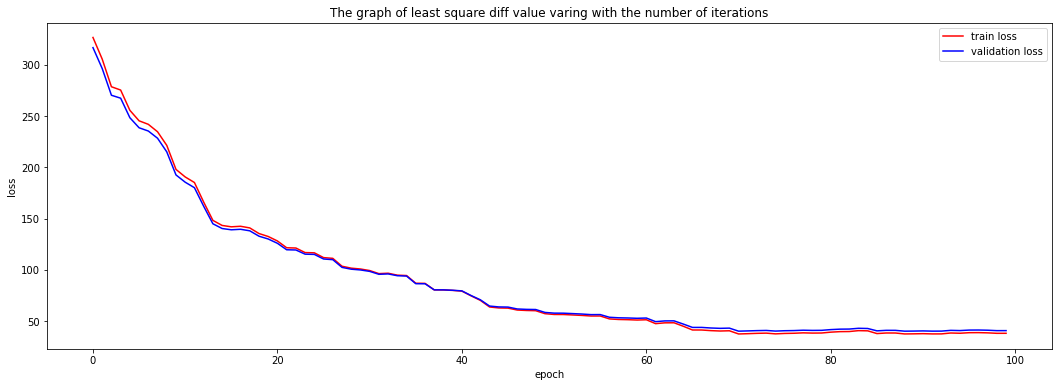

In [9]:
#draw
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))
plt.plot(losses_train,color="r", label="train loss")
plt.plot(losses_val,color="b", label="validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title("The graph of least square diff value varying with the number of iterations")